In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df_tags = pd.read_csv('../data/raw/ml-25m/tags.csv')
# df_gscores = pd.read_csv('../data/raw/ml-25m/genome-scores.csv')
# df_gtags = pd.read_csv('../data/raw/ml-25m/genome-tags.csv')
# df_links = pd.read_csv('../data/raw/ml-25m/links.csv')
#df_movies = pd.read_csv('../data/raw/ml-25m/movies.csv')
df_ratings = pd.read_csv('../data/raw/ml-25m/ratings.csv')

In [18]:
# display(df_tags.head())
# print(df_tags.info())
display(df_ratings.head())
print(df_ratings.info())

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB
None


In [3]:
df_ratings.drop(['rating','timestamp'], axis=1).duplicated().sum()
# no movie is rated twice by same user

0

In [13]:
user_rating_sum = df_ratings.drop(['rating','timestamp'], axis=1).groupby(by=['userId']).count()
user_rating_sum.rename(columns={'movieId':'n_movies'}, inplace=True)
user_rating_dist = df_ratings.drop(['timestamp'], axis=1).groupby(by=['userId','rating']).count()
user_rating_dist.rename(columns={'movieId':'n_movies'}, inplace=True)
user_rating_avg = df_ratings.drop(['movieId','timestamp'], axis=1).groupby(by=['userId']).mean()
user_rating_avg.rename(columns={'rating':'avg_rating'}, inplace=True)

In [19]:
print('Basic statistics for average rating per each user:')
display(user_rating_avg.describe())

Basic statistics for average rating per each user:


,avg_rating
count,162541.000000
mean,3.679205
std,0.477368
min,0.500000
25%,3.398747
50%,3.700000
75%,4.000000
max,5.000000


In [5]:
print('Basic statistics for number of movies rated by each user:')
display(user_rating_sum.describe())
# min number of movies rated by each user: 20
# max number of movies rated by each user: 32202 => probably outlier, further analysis necessary
# median number of movies rated by each user: 71

print('Number of users, who rated more than 1000 movies:', user_rating_sum[user_rating_sum.n_movies > 1000].count().iloc[0])
print('Number of users, who rated more than 5000 movies:', user_rating_sum[user_rating_sum.n_movies > 5000].count().iloc[0])
print('\nTop 10 users:')
print(user_rating_sum.sort_values('n_movies', ascending=False).head(10))


display(user_rating_dist.loc[[72315]])
display(user_rating_dist.loc[[80974]])
display(user_rating_dist.loc[[137293]])
display(user_rating_dist.loc[[33844]])
display(user_rating_dist.loc[[20055]])

Basic statistics for number of movies rated by each user:


,n_movies
count,162541.000000
mean,153.807932
std,268.047590
min,20.000000
25%,36.000000
50%,71.000000
75%,162.000000
max,32202.000000


Number of users, who rated more than 1000 movies: 2670
Number of users, who rated more than 5000 movies: 18

Top 10 users:
        n_movies
userId          
72315      32202
80974       9178
137293      8913
33844       7919
20055       7488
109731      6647
92046       6564
49403       6553
30879       5693
115102      5649


n_movies
userId rating          
72315  0.5          182
       1.0          327
       1.5          754
       2.0         2219
       2.5         5914
       3.0        10004
       3.5         8069
       4.0         2983
       4.5         1012
       5.0          738

n_movies
userId rating          
80974  0.5            3
       2.0          472
       2.5          523
       3.0         4049
       3.5         1757
       4.0         2279
       4.5           68
       5.0           27

n_movies
userId rating          
137293 0.5            5
       1.0           29
       1.5           80
       2.0          328
       2.5          819
       3.0         3536
       3.5         3233
       4.0          758
       4.5          113
       5.0           12

n_movies
userId rating          
33844  0.5          446
       1.0          780
       1.5          518
       2.0         1165
       2.5         1069
       3.0         1528
       3.5         1541
       4.0          559
       4.5          258
       5.0           55

n_movies
userId rating          
20055  1.0           72
       1.5          380
       2.0          894
       2.5         1129
       3.0         1437
       3.5         1081
       4.0         1528
       4.5          532
       5.0          435

In [ ]:
# mux = pd.MultiIndex.from_arrays([
#     list('aaaabbbbbccddddd'),
#     list('tuvwtuvwtuvwtuvw')
# ], names=['one', 'two'])

# df = pd.DataFrame({'col': np.arange(len(mux))}, mux)
# df.loc[['a']]

In [39]:
df_rat = user_rating_avg.merge(right=user_rating_sum, on='userId', how='outer')
df_rat.rename(columns={'n_movies':'n_ratings'}, inplace=True)
display(df_rat.head())

print('Number of users, who only made 5.0 ratings:', df_rat[df_rat.avg_rating == 5].count().iloc[0])

,avg_rating,n_ratings
userId,,
1,3.814286,70
2,3.630435,184
3,3.697409,656
4,3.378099,242
5,3.752475,101


Number of users, who only made 5.0 ratings: 203


<div class="alert alert-block alert-info"><b>Caution:</b> sns.relplot is not compatible with subplots!</div>

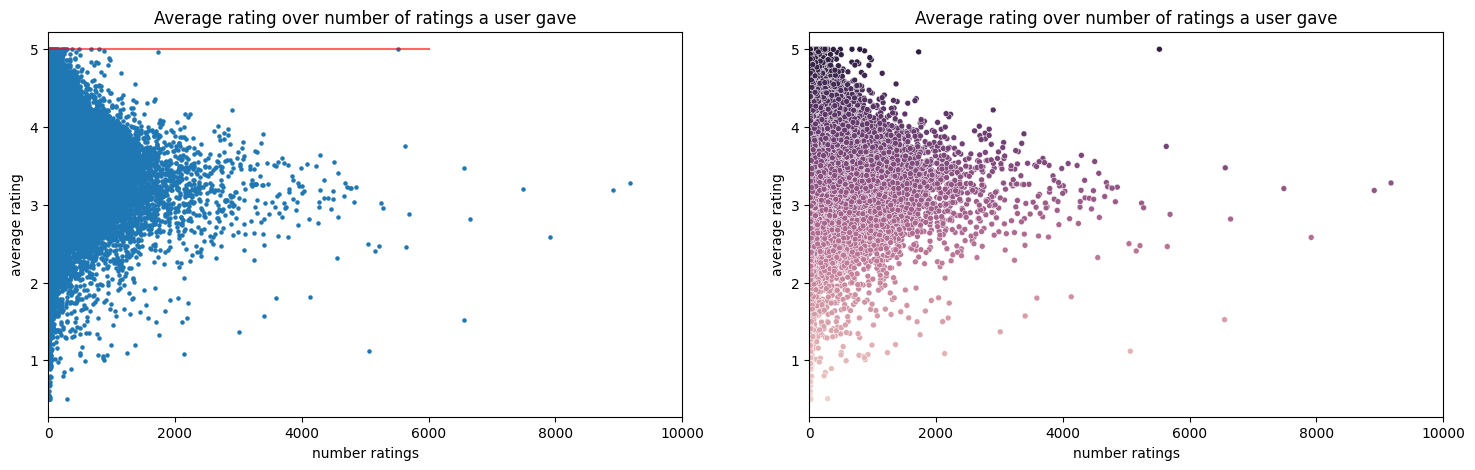

In [68]:
%matplotlib inline
fig, ax = plt.subplots(figsize=(18, 5))
# remove axes and frame of subplot figure
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.axis('off')
plt.subplots_adjust(hspace=0.5) # prevents overlapping of single plots

plt.subplot(121)
plt.scatter(x=df_rat.n_ratings, y=df_rat.avg_rating, s=5)
plt.xlim([0,10000])
plt.title('Average rating over number of ratings a user gave')
plt.xlabel('number ratings')
plt.ylabel('average rating')
plt.plot([0,6000],[5,5], c='r', alpha=0.6)

plt.subplot(122)
# sns.relplot(x=df_rat.n_ratings, y=df_rat.avg_rating) # relplot is not compatible with subplots!
sns.scatterplot(x=df_rat.n_ratings, y=df_rat.avg_rating, hue=df_rat.avg_rating, size=10, legend=False)
plt.xlim([0,10000])
plt.title('Average rating over number of ratings a user gave')
plt.xlabel('number ratings')
plt.ylabel('average rating');

# the average rating of users with fewer ratings tend to be more dispersed than the average of users with many ratings 

{'whiskers': [<matplotlib.lines.Line2D at 0x2980c34c0b0>,
 'caps': [<matplotlib.lines.Line2D at 0x2980c34c830>,
 'boxes': [<matplotlib.lines.Line2D at 0x2980c34c230>],
 'medians': [<matplotlib.lines.Line2D at 0x2980c34cdd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2980c34d0d0>],
 'means': []}

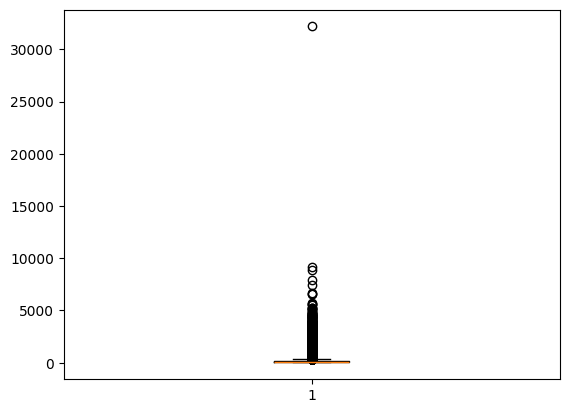

In [7]:
plt.boxplot(x=user_rating_sum)



In [8]:
df_tags.loc[df_tags.tag.isna() == True]

,userId,movieId,tag,timestamp
860902,121710,33826,NaN,1221450908
976395,141727,123,NaN,1199450867
976396,141727,346,NaN,1199451946
976400,141727,1184,NaN,1199452261
976407,141727,1785,NaN,1199452006
976408,141727,2194,NaN,1199450677
976410,141727,2691,NaN,1199451002
976418,141727,4103,NaN,1199451920
976420,141727,4473,NaN,1199451040
976422,141727,4616,NaN,1199452441


In [9]:
# # hot-one encoding to split genres in separate columns using pandas strin method
# df_movies = pd.concat([df_movies, df_movies['genres'].str.get_dummies(sep='|')], axis=1)
# # removing unnecessary columns
# df_movies.drop(['title','genres'], axis=1, inplace=True)
# # rename column to avoid spaces
# df_movies.rename(columns={'(no genres listed)':'no_genre_listed'}, inplace=True)

This is what the new df_movies looks like:

In [10]:
df_movies.head()

NameError: name 'df_movies' is not defined

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

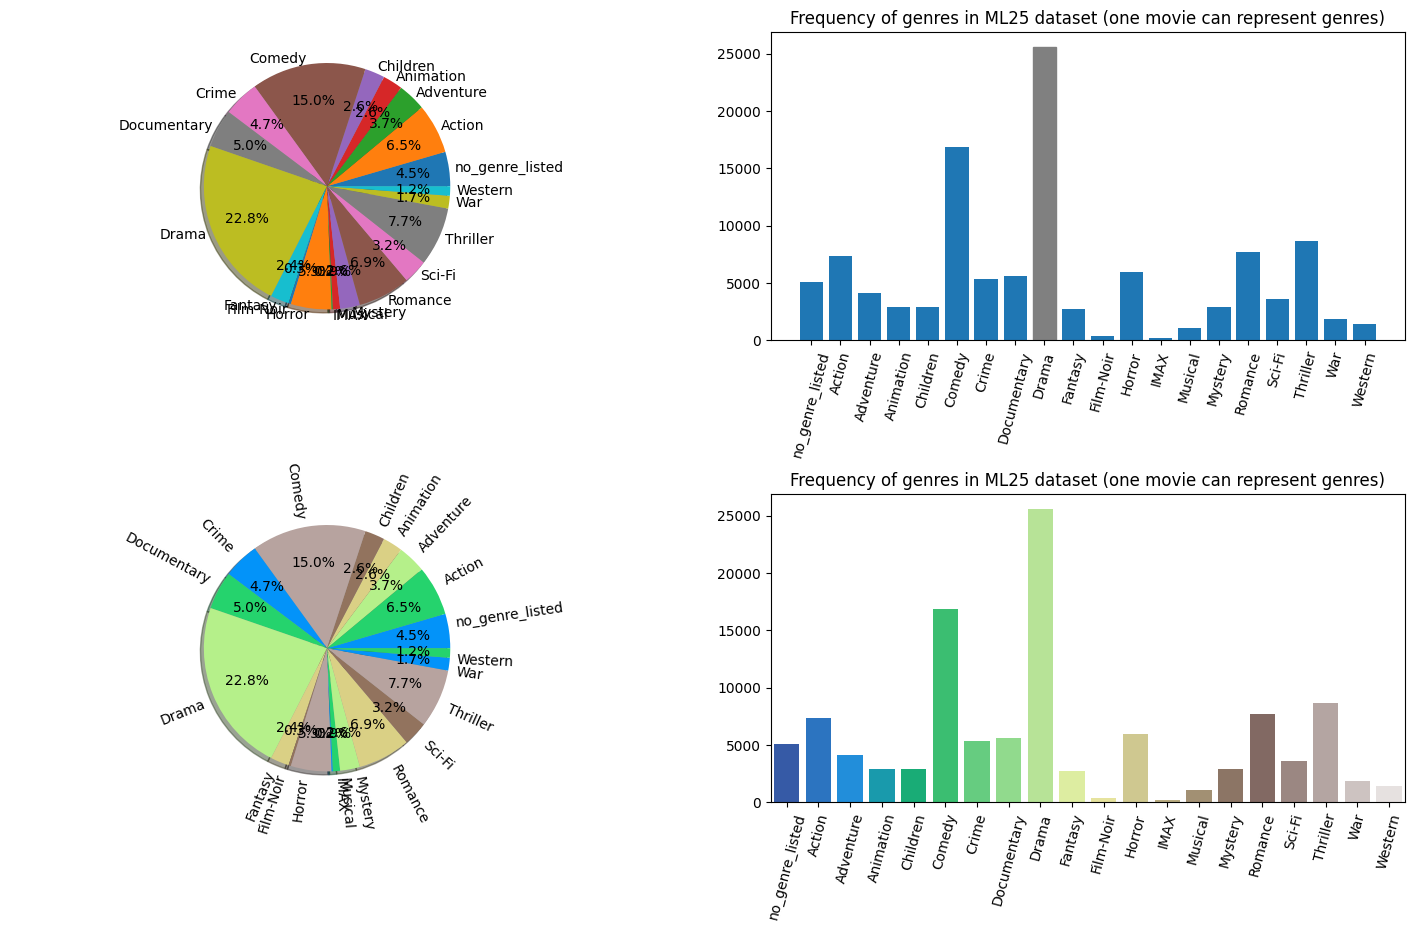

In [ ]:
frequency_genres = df_movies.iloc[:,1:].sum()#.sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(18, 10))
# remove axes and frame of subplot figure
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.axis('off')
plt.subplots_adjust(hspace=0.5) # prevents overlapping of single plots

plt.subplot(221)
plt.pie(frequency_genres, labels = frequency_genres.index, autopct = lambda x: str(round(x, 1)) + '%',\
        pctdistance = 0.7, labeldistance = 1.05, shadow = True)
plt.subplot(222)
plt.bar(frequency_genres.index, frequency_genres)[8].set_color('gray')
plt.title('Frequency of genres in ML25 dataset (one movie can represent genres)')
plt.xticks(rotation=75)
plt.subplot(223)
colors = sns.color_palette('terrain')[0:]
plt.pie(frequency_genres, labels = frequency_genres.index, autopct = lambda x: str(round(x, 1)) + '%',\
        pctdistance = 0.7, labeldistance = 1.05, shadow = True, rotatelabels=True, colors=colors)
plt.subplot(224)
sns.barplot(x = frequency_genres.index, y = frequency_genres, hue = frequency_genres.index, palette='terrain')
plt.title('Frequency of genres in ML25 dataset (one movie can represent genres)')
plt.xticks(rotation=75)
plt.xlabel('')
plt.ylabel('');

In [ ]:
display(df_ratings.head())
print(df_ratings.info())
df_ratings.isna().sum()

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817
2,1,307,5.0,1147868828
3,1,665,5.0,1147878820
4,1,899,3.5,1147868510


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000095 entries, 0 to 25000094
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 762.9 MB
None


userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [ ]:
# calculate average rating of each movie
rating_avg = df_ratings.drop(['userId','timestamp'], axis=1).groupby('movieId').mean()
rating_avg.rename(columns={'rating':'rating_avg'}, inplace=True)
rating_avg.head()

,rating_avg
movieId,
1,3.893708
2,3.251527
3,3.142028
4,2.853547
5,3.058434


<code style="background:yellow;color:black">Is it ok to replace NaNs in rating_avg with mean? => yes, possibly replace with avg of movies with respective genres.</code>

In [ ]:
import sys
# join df_movies and average rating
genre_ratings = df_movies.merge(right=rating_avg, on = 'movieId', how = 'left')
print('The column \'rating_avg\' does contain %i missing values and is of type %s.' % (genre_ratings.rating_avg.isna().sum(), genre_ratings.rating_avg.dtypes))
# replace NaNs with mean or drop NaNs? => replace
mean = genre_ratings.rating_avg.mean()
print('The missing values are replaced with the mean rating which is %.2f.' % mean)
#genre_ratings.rating_avg.fillna(mean, inplace=True) # throws warning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method
genre_ratings.fillna({'rating_avg':mean}, inplace=True) # alternative 1
#genre_ratings.rating_avg = genre_ratings.rating_avg.fillna(mean) # alternative 2

# casting all columns to float so they can hold average rating which is float
genre_ratings = genre_ratings.astype('float64')

# multiply each genre column with rating_avg
for column in genre_ratings:
    if column != 'movieId' and column != 'rating_avg':
        genre_ratings[column] = genre_ratings[column] * genre_ratings['rating_avg']

The column 'rating_avg' does contain 3376 missing values and is of type float64.
The missing values are replaced with the mean rating which is 3.07.


In [ ]:
display(genre_ratings.head())
genre_ratings.info()

,movieId,no_genre_listed,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,rating_avg
0,1.0,0.0,0.0,3.893708,3.893708,3.893708,3.893708,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.893708
1,2.0,0.0,0.0,3.251527,0.000000,3.251527,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.251527
2,3.0,0.0,0.0,0.000000,0.000000,0.000000,3.142028,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,3.142028,0.0,0.0,0.0,0.0,3.142028
3,4.0,0.0,0.0,0.000000,0.000000,0.000000,2.853547,0.0,0.0,2.853547,...,0.0,0.0,0.0,0.0,2.853547,0.0,0.0,0.0,0.0,2.853547
4,5.0,0.0,0.0,0.000000,0.000000,0.000000,3.058434,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,3.058434


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62423 entries, 0 to 62422
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movieId          62423 non-null  float64
 1   no_genre_listed  62423 non-null  float64
 2   Action           62423 non-null  float64
 3   Adventure        62423 non-null  float64
 4   Animation        62423 non-null  float64
 5   Children         62423 non-null  float64
 6   Comedy           62423 non-null  float64
 7   Crime            62423 non-null  float64
 8   Documentary      62423 non-null  float64
 9   Drama            62423 non-null  float64
 10  Fantasy          62423 non-null  float64
 11  Film-Noir        62423 non-null  float64
 12  Horror           62423 non-null  float64
 13  IMAX             62423 non-null  float64
 14  Musical          62423 non-null  float64
 15  Mystery          62423 non-null  float64
 16  Romance          62423 non-null  float64
 17  Sci-Fi      

In [ ]:
genre_ratings_agg = genre_ratings.drop(['movieId','rating_avg'], axis=1)
# replace 0s with NaN so they do not influence the average
genre_ratings_agg = genre_ratings_agg.replace({0:np.nan})
genre_ratings_agg = genre_ratings_agg.mean()
genre_ratings_agg

no_genre_listed    3.050835
Action             2.934973
Adventure          3.015595
Animation          3.100962
Children           3.033952
Comedy             3.043310
Crime              3.091499
Documentary        3.374056
Drama              3.174201
Fantasy            3.021986
Film-Noir          3.315346
Horror             2.667807
IMAX               3.252121
Musical            3.195997
Mystery            3.047038
Romance            3.143034
Sci-Fi             2.768572
Thriller           2.949208
War                3.236795
Western            3.033679
dtype: float64

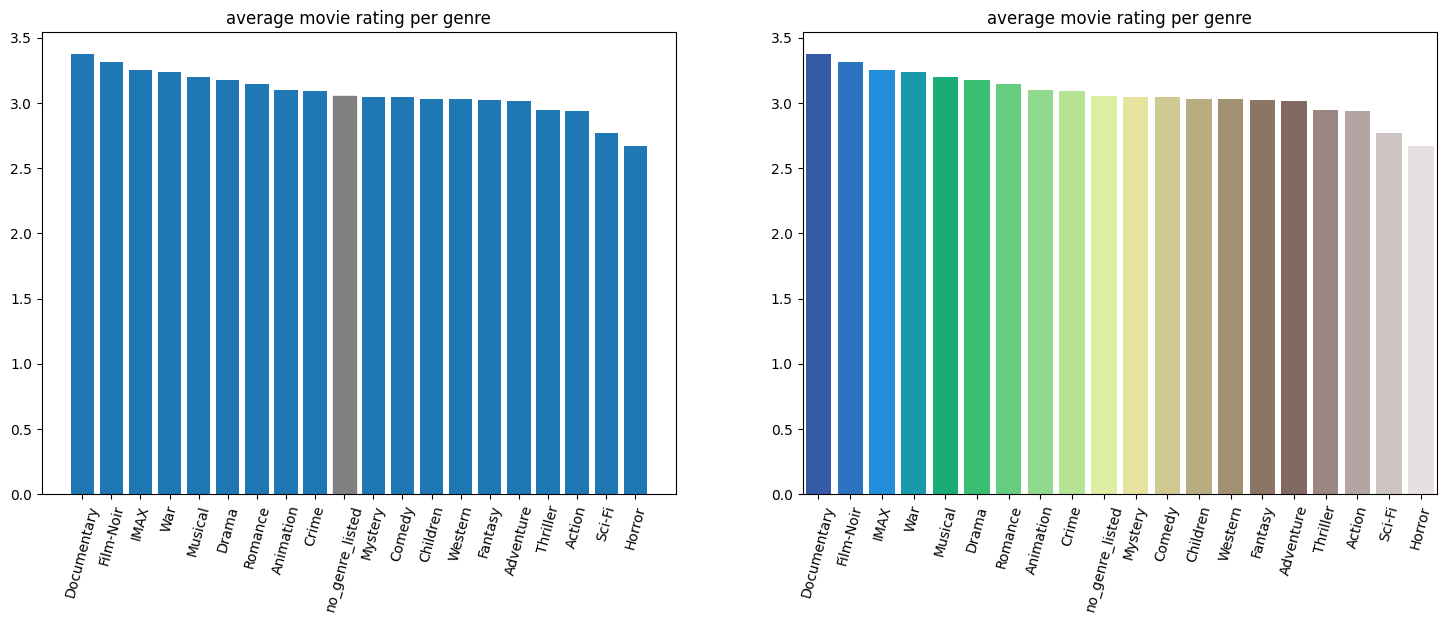

In [ ]:
fig, ax = plt.subplots(figsize=(18, 6))
# remove axes and frame of subplot figure
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
ax.axis('off')

plt.subplot(121)
plt.bar(genre_ratings_agg.sort_values(ascending=False).index, genre_ratings_agg.sort_values(ascending=False))[9].set_color('gray')
plt.title('average movie rating per genre')
plt.xticks(rotation=75)
plt.subplot(122)
sns.barplot(x = genre_ratings_agg.sort_values(ascending=False).index, y = genre_ratings_agg.sort_values(ascending=False),
            hue = genre_ratings_agg.sort_values(ascending=False).index, palette='terrain')
plt.title('average movie rating per genre')
plt.xticks(rotation=75)
plt.xlabel('')
plt.ylabel('');

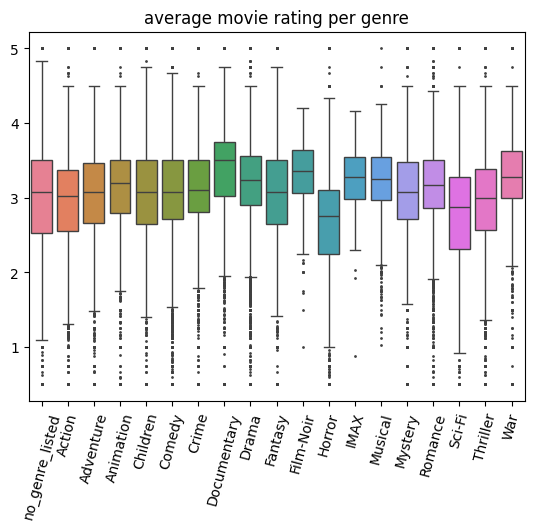

In [ ]:

sns.boxplot(genre_ratings.replace({0:np.nan}).iloc[:,1:-2], fliersize=1)
plt.title('average movie rating per genre')
plt.xticks(rotation=75);


<div class="alert alert-block alert-warning"><b>Warning:</b> matplotlib does not handle NaNs in boxplots well (see example below).</div>

,action,drama,thriller
0,4,NaN,1
1,4,2.0,1
2,0,3.0,3
3,5,4.0,5
4,3,NaN,5


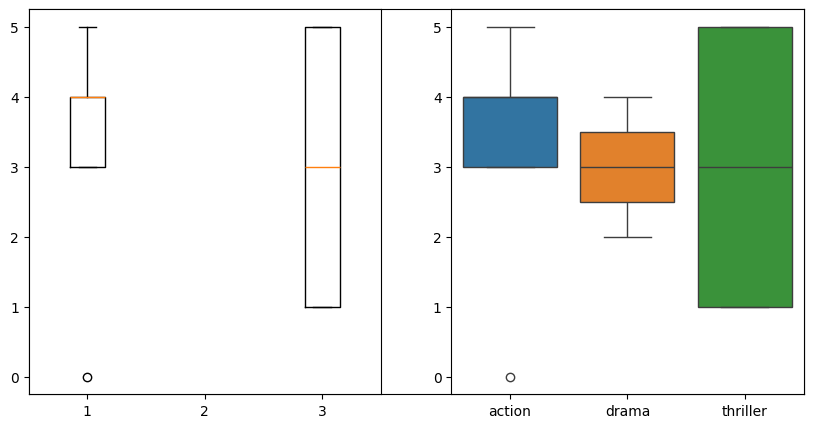

In [ ]:
df = pd.DataFrame({'action': [4,4,0,5,3], 'drama':[np.nan,2,3,4,np.nan],'thriller':[1,1,3,5,5]})
display(df)
fig, ax = plt.subplots(figsize=(10, 5))
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)
plt.subplot(121)
plt.boxplot(df)
plt.subplot(122)
sns.boxplot(df);